Natalie LaLuzerne

The data sets used for this anomaly detection were fairly simple and clean. Each set contained a timestamp and a value column. One feature engineering technique that could be performed on this data set is to convert the timestamp column into a Python Datetime object for use anomaly detection since many python models in Python utilize Python Datetime objects. For this data analysis, I chose not to convert the timestamp column to a python datetime object because I used Interquartile Range statistics to detect anomalies and the timestamp column was not needed. 

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

Constants 

In [2]:
data_path = r'..\Data\realTraffic\\'
filenames = [ 'occupancy_6005.csv', 'occupancy_t4013.csv',
              'speed_6005.csv', 'speed_7578.csv', 'speed_t4013.csv',
              'TravelTime_387.csv', 'TravelTime_451.csv' ]

Load the data sets

In [3]:
data = [ pd.read_csv( data_path + i ) for i in filenames ]

Show the data sets

In [4]:
data[ 0 ].head()

,timestamp,value
0,2015-09-01 13:45:00,3.06
1,2015-09-01 13:50:00,6.44
2,2015-09-01 13:55:00,5.17
3,2015-09-01 14:00:00,3.83
4,2015-09-01 14:05:00,4.50


In [5]:
data[ 1 ].head()

,timestamp,value
0,2015-09-01 11:30:00,13.56
1,2015-09-01 11:35:00,8.33
2,2015-09-01 11:40:00,11.78
3,2015-09-01 11:55:00,15.28
4,2015-09-01 12:00:00,10.06


In [6]:
data[ 2 ].head()

,timestamp,value
0,2015-08-31 18:22:00,90
1,2015-08-31 18:32:00,80
2,2015-08-31 18:57:00,84
3,2015-08-31 19:07:00,94
4,2015-08-31 19:12:00,90


In [7]:
data[ 3 ].head()

,timestamp,value
0,2015-09-08 11:39:00,73
1,2015-09-08 11:44:00,62
2,2015-09-08 11:59:00,66
3,2015-09-08 12:19:00,69
4,2015-09-08 12:24:00,65


In [8]:
data[ 4 ].head()

,timestamp,value
0,2015-09-01 11:25:00,58
1,2015-09-01 11:30:00,63
2,2015-09-01 11:35:00,63
3,2015-09-01 11:40:00,64
4,2015-09-01 11:55:00,58


In [9]:
data[ 5 ].head()

,timestamp,value
0,2015-07-10 14:24:00,564
1,2015-07-10 14:38:00,730
2,2015-07-10 14:48:00,770
3,2015-07-10 15:03:00,910
4,2015-07-10 15:22:00,1035


In [10]:
data[ 6 ].head()

,timestamp,value
0,2015-07-28 11:56:00,248
1,2015-07-28 12:06:00,178
2,2015-07-28 12:25:00,155
3,2015-07-28 13:56:00,121
4,2015-07-28 14:06:00,103


Even thought each of the data sets have the same exact columns, I don't think it would be a good idea to combine the data sets into one data set as there is a large variance between the values in the value column of each of the data sets. Combining them into one data set would make anomaly detection much harder and much less accurate. For this reason, I will analyze and detect anomalies in each of the data sets separately.

Plot the datasets as-is to see if we can easily see any anomalies in the data without any additional analysis.

Text(0.5, 1.0, 'occupancy_6005.csv')

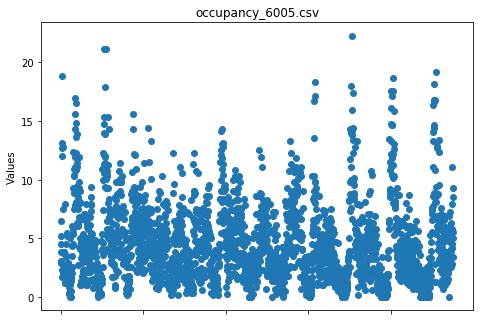

In [11]:
df = 0
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'occupancy_t4013.csv')

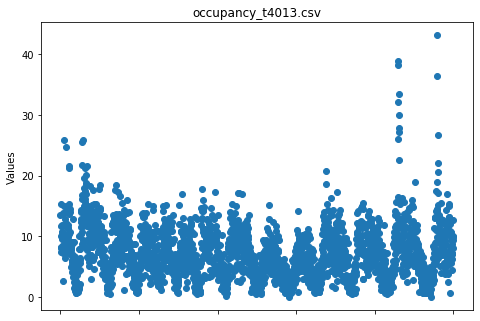

In [12]:
df = 1
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'speed_6005.csv')

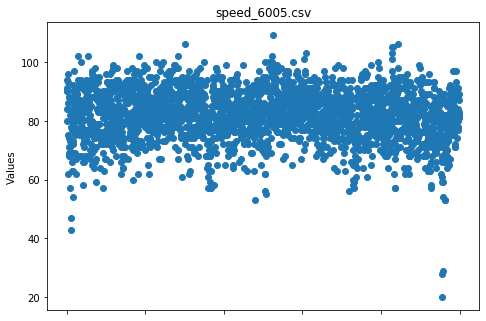

In [13]:
df = 2
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'speed_7578.csv')

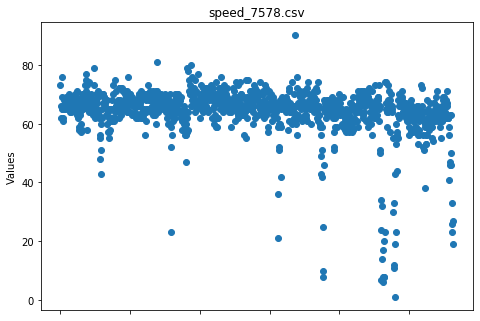

In [14]:
df = 3
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'speed_t4013.csv')

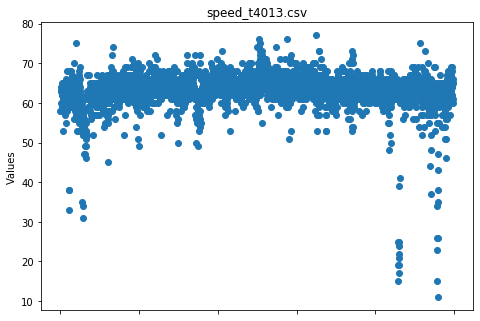

In [15]:
df = 4
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'TravelTime_387.csv')

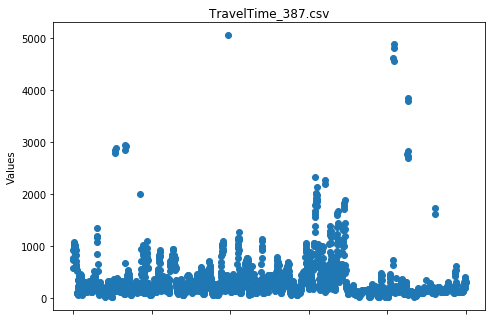

In [16]:
df = 5
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'TravelTime_451.csv')

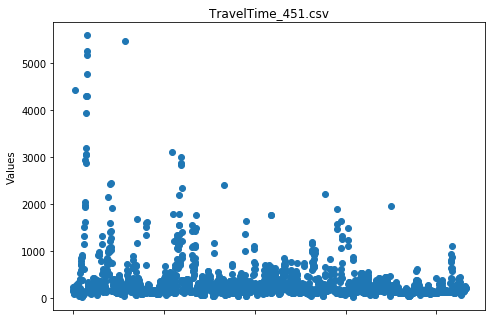

In [17]:
df = 6
fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

In all of these data sets, it seems fairly obvious which data points are anomalies and which are "normal" - there seems to be a large clustering of data points within a certain range and then there are data points that stray from the cluster. 

Apply Interquartile Range Statistics to the data sets to see if we can quantifiably detect anomalies in the data 

In [18]:
def print_IQR( IQR, lower_bound, upper_bound, q1, q3 ):
    print( 'Interquartile Range: ', IQR )
    print( 'Lower Bound: ', lower_bound )
    print( 'Upper Bound: ', upper_bound )
    print( 'Q1: ', q1 )
    print( 'Q3: ', q3 )

In [19]:
def print_anomalies( count, total ):
    print( "Number of Anomalies: ", count )
    print( "Percentage of total: ", np.round( ( ( count / total ) * 100 ), decimals = 3 ), '%' )

In [20]:
def count_anomalies( df, upper_bound, lower_bound ):
    count = 0
    total = 0
    for row in df.iterrows():
        total += 1
        if( row[ 1 ][ 'value' ] > upper_bound or row[ 1 ][ 'value' ] < lower_bound ):
            count += 1
    print_anomalies( count, total )

In [21]:
def calculate_IQR( df ):
    sorted( df[ 'value' ] )
    q1, q3 = np.percentile( df[ 'value' ], [ 25, 75 ] )
    IQR = np.round( iqr( df[ 'value' ] ), decimals = 3 )
    lower_bound = np.round( q1 - ( 1.5 * IQR ), decimals = 3 )
    upper_bound = np.round( q3 + ( 1.5 * IQR ), decimals = 3 )
    print_IQR( IQR, lower_bound, upper_bound, q1, q3 )
    count_anomalies( df, upper_bound, lower_bound )
    return lower_bound, upper_bound

In [22]:
lower_bounds = [ 0, 0, 0, 0, 0, 0, 0 ]
upper_bounds = [ 0, 0, 0, 0, 0, 0, 0 ]

In [23]:
df = 0
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  4.23
Lower Bound:  -4.405
Upper Bound:  12.515
Q1:  1.94
Q3:  6.17
Number of Anomalies:  74
Percentage of total:  3.109 %


In [24]:
df = 1
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  5.77
Lower Bound:  -4.595
Upper Bound:  18.485
Q1:  4.06
Q3:  9.83
Number of Anomalies:  33
Percentage of total:  1.32 %


In [25]:
df = 2
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  11.0
Lower Bound:  60.5
Upper Bound:  104.5
Q1:  77.0
Q3:  88.0
Number of Anomalies:  39
Percentage of total:  1.56 %


In [26]:
df = 3
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  5.0
Lower Bound:  55.5
Upper Bound:  75.5
Q1:  63.0
Q3:  68.0
Number of Anomalies:  83
Percentage of total:  7.365 %


In [27]:
df = 4
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  4.0
Lower Bound:  55.0
Upper Bound:  71.0
Q1:  61.0
Q3:  65.0
Number of Anomalies:  113
Percentage of total:  4.529 %


In [28]:
df = 5
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  233.0
Lower Bound:  -216.5
Upper Bound:  715.5
Q1:  133.0
Q3:  366.0
Number of Anomalies:  217
Percentage of total:  8.68 %


In [29]:
df = 6
lower_bounds[ df ], upper_bounds[ df ] = calculate_IQR( data[ df ] )

Interquartile Range:  186.0
Lower Bound:  -133.0
Upper Bound:  611.0
Q1:  146.0
Q3:  332.0
Number of Anomalies:  208
Percentage of total:  9.621 %


After applying Interquartile Range Statistics on each of the data sets, it seems that between 1%-10% of each of the data sets are anomalous, depending on which data set you look at. The interquartile range has identified the clusters that I mentioned earlier, and then identified the points that fall outside of these clusters. The interquartile range generally has a good baseline accuracy, so let's visualize the anomalies that were detected using the Interquartile Range.

Plot the data sets with the anomalies detected

In [30]:
under_lower_bounds = []
above_upper_bounds = []

df = 0
for i in range( len( data ) ):
    under_lower_bounds.append( data[ df ][ 'value' ] < lower_bounds[ df ] )
    above_upper_bounds.append( data[ df ][ 'value' ] > upper_bounds[ df ] )
    df += 1

In [31]:
anomalies = [ data[ i ][ under_lower_bounds[ i ] | above_upper_bounds[ i ] ] for i in range( len( data ) ) ]

Text(0.5, 1.0, 'occupancy_6005.csv')

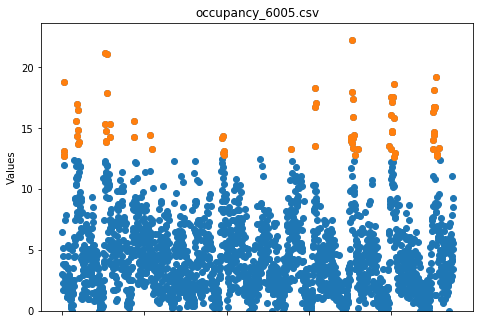

In [32]:
df = 0

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'occupancy_t4013.csv')

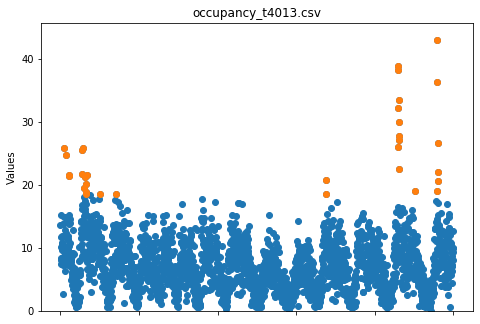

In [33]:
df = 1

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'speed_6005.csv')

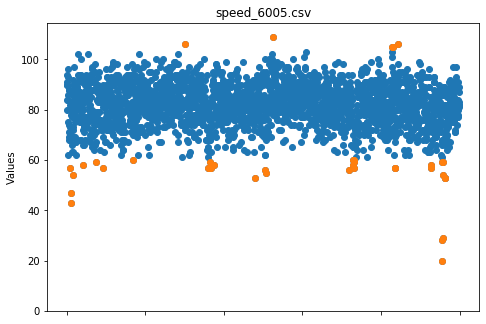

In [34]:
df = 2

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'speed_7578.csv')

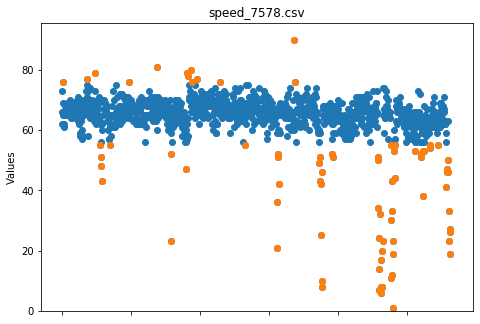

In [35]:
df = 3

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'speed_t4013.csv')

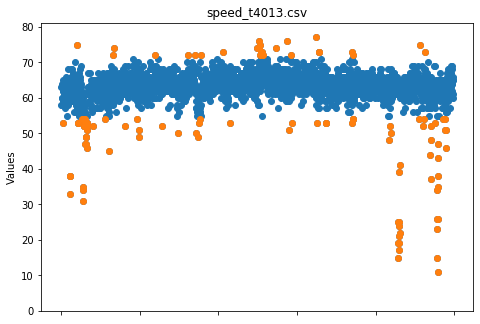

In [36]:
df = 4

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'TravelTime_387.csv')

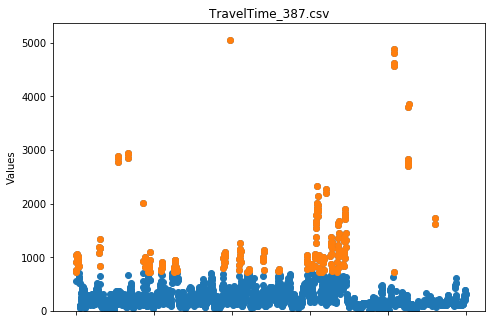

In [37]:
df = 5

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

Text(0.5, 1.0, 'TravelTime_451.csv')

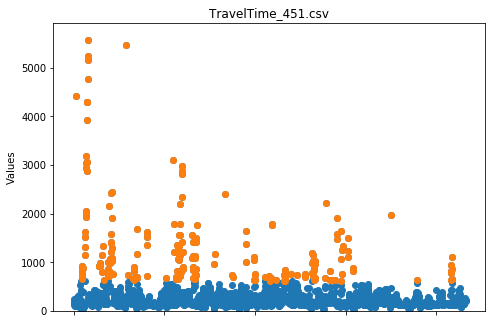

In [38]:
df = 6

plot = []
count = 0
for i in range( len ( data[ df ][ 'timestamp' ] ) ):
    if i in anomalies[ df ].index:
        plot.append( anomalies[ df ][ 'value' ].iloc[ count ] )
        count += 1
    else:
        plot.append( np.NaN )

fig = plt.figure()
ax = fig.add_axes( [ 0, 0, 1, 1 ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), data[ df ][ 'value' ] )
ax.scatter( range( len( data[ df ][ 'timestamp' ] ) ), plot )
ax.set_ylim( bottom=0 )
ax.set_ylabel( 'Values' )
ax.set_xticklabels([])
ax.set_title( filenames[ df ] )

After plotting each of the data sets with the anomalies highlighted (in orange), it seems that the Interquartile Range did a pretty good job at detecting the anaomalies. Each of the main clusters in the data sets seems to have made it through the IQR analysis as being "normal" while the data points that stray from the clusters are identified as anomalous.